<a href="https://colab.research.google.com/github/theclassofai/COVID_19/blob/master/COVID_Analysis_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/CSSEGISandData/COVID-19.git 

Cloning into 'COVID-19'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 16353 (delta 0), reused 3 (delta 0), pack-reused 16341
Receiving objects: 100% (16353/16353), 64.12 MiB | 12.34 MiB/s, done.
Resolving deltas: 100% (8081/8081), done.


In [2]:
# Import packages to be used 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from fbprophet import Prophet
!pip install pycountry
import pycountry
import plotly.express as px
from collections import namedtuple

In [0]:
confirmed = pd.read_csv("/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
recovered = pd.read_csv("/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
deaths = pd.read_csv("/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")



In [0]:
confirmed = np.sum(confirmed.iloc[:,4:confirmed.shape[1]])
recovered = np.sum(recovered.iloc[:,4:recovered.shape[1]])
deaths = np.sum(deaths.iloc[:,4:deaths.shape[1]])

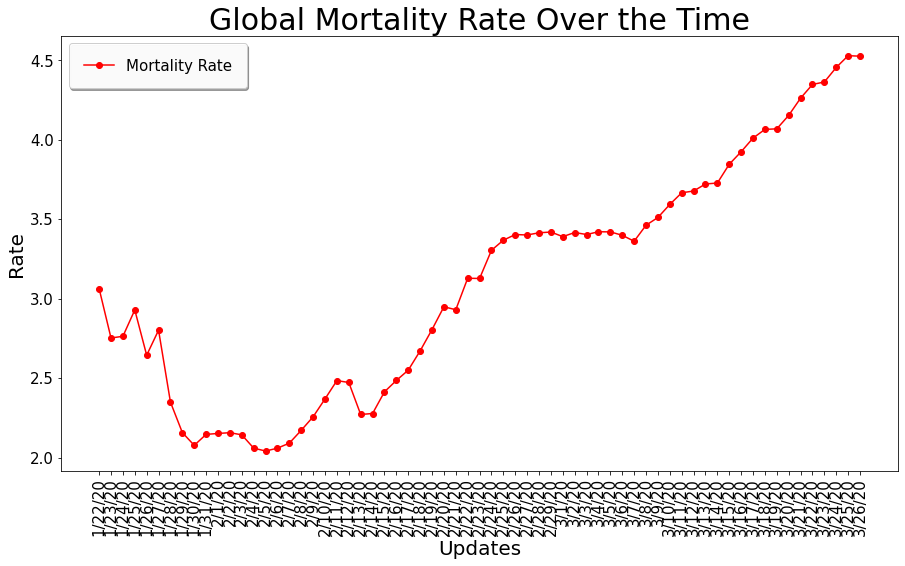

In [10]:
global_mortality = (deaths/confirmed)*100

# defyning plotsize
plt.figure(figsize=(15,8))

# creating a lineplot for each case variable(suspected, recovered and death)
plt.plot(global_mortality
        , color = 'red'
        , label = 'Mortality Rate'
        , marker = 'o')

# defyning titles, labels and ticks parameters
plt.title('Global Mortality Rate Over the Time',size=30)
plt.ylabel('Rate',size=20)
plt.xlabel('Updates',size=20)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)

# defyning legend parameters
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

In [0]:
confirmed = pd.read_csv("/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
recovered = pd.read_csv("/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
deaths = pd.read_csv("/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")


In [0]:
# replacing missings
confirmed = confirmed.fillna(0)
recovered = recovered.fillna(0)
deaths = deaths.fillna(0)

In [0]:
# defyning the last update
last_update = '3/26/20'

In [0]:
#taking total confirmed, recovered and deaths from last_update and joing

confir = confirmed[['Province/State',last_update]][confirmed['Country/Region']=='China'][last_update]
recover = recovered[last_update][recovered['Country/Region']=='China']
deat = deaths[last_update][deaths['Country/Region']=='China']

china_cases = confirmed[['Province/State',last_update]][confirmed['Country/Region']=='China']
china_cases['recovered'] = recover
china_cases['non_recovered'] = confir-recover-deat
china_cases['deaths'] = deat

# setting "Province/State" as index
china_cases = china_cases.set_index('Province/State')

# renaming columns
china_cases = china_cases.rename(columns = {last_update:'confirmed'
                                            ,'recovered':'recovered'
                                            ,'non_recovered':'non_recovered'
                                            ,'deaths':'deaths'})

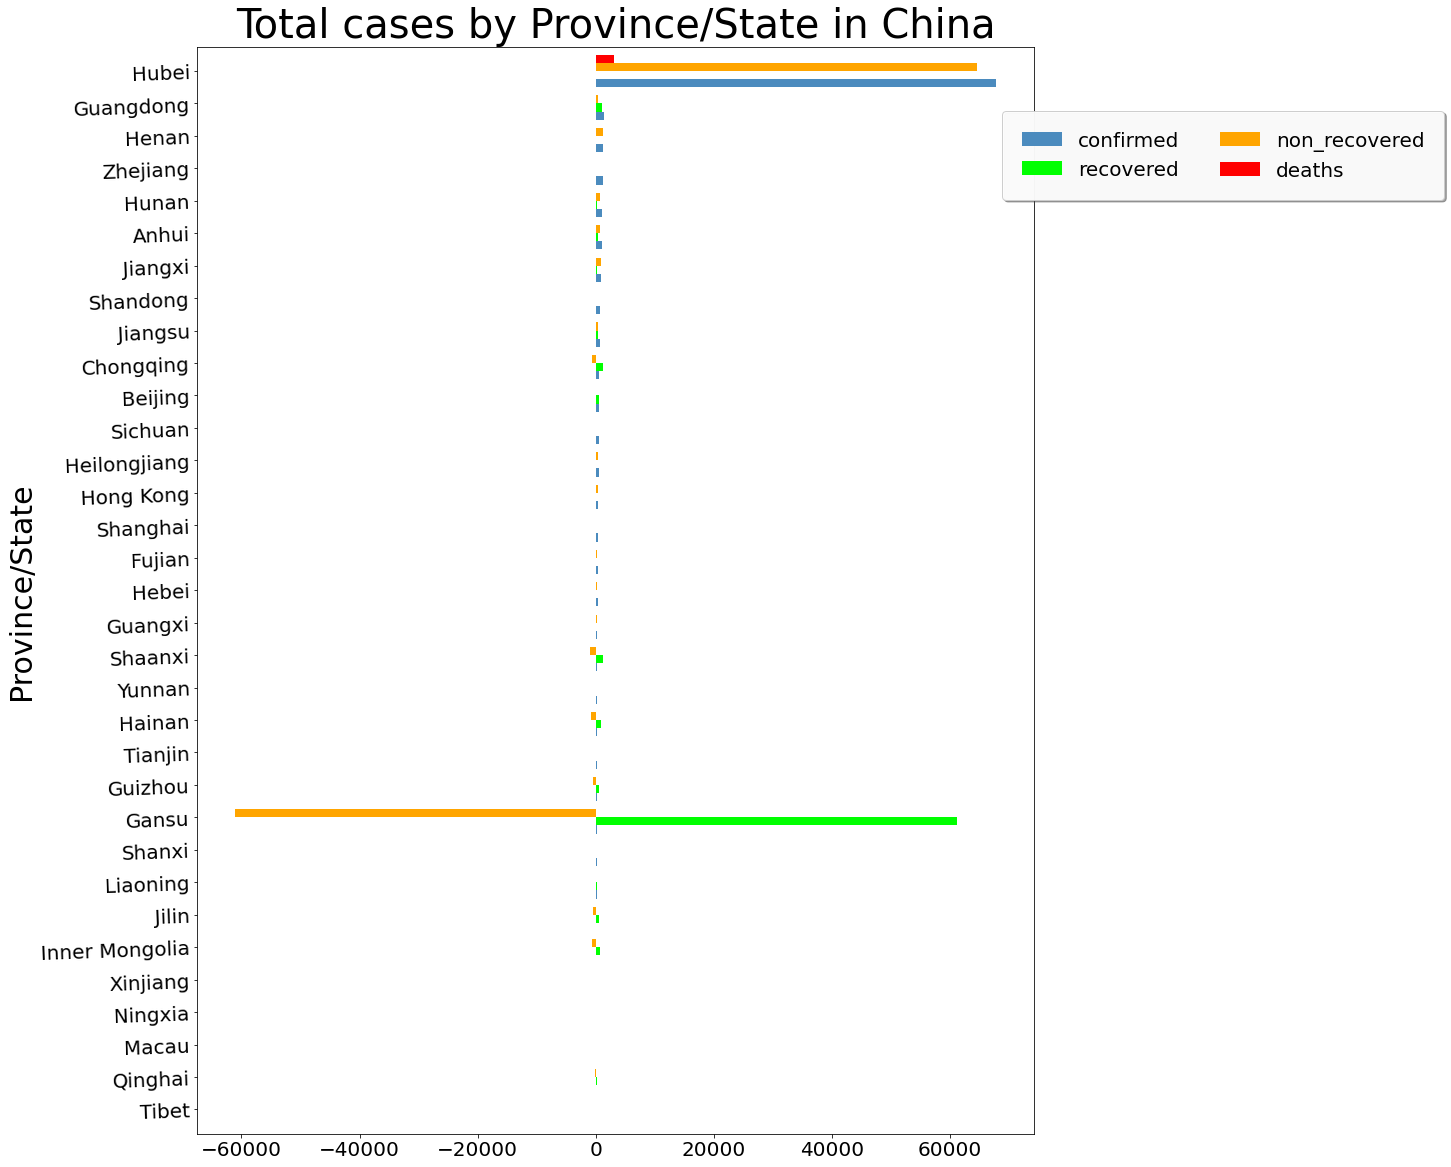

In [19]:
# creating the plot
china_cases.sort_values(by='confirmed',ascending=True).plot(kind='barh'
                                                            , figsize=(15,20)
                                                            , color = ['#4b8bbe','lime','orange','red']
                                                            , width=1
                                                            , rot=2)

# defyning legend and titles parameters
plt.title('Total cases by Province/State in China', size=40)
plt.ylabel('Province/State',size=30)
plt.yticks(size=20)
plt.xticks(size=20)
plt.legend(bbox_to_anchor=(0.95,0.95) # setting coordinates for the caption box
           , frameon = True
           , fontsize = 20
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);